In [24]:
from numpy import *
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context="notebook", style='whitegrid', palette="dark")
import matplotlib.pyplot as plt

# Linear Regression with one variable

In [25]:
data = pd.read_csv('ex1data1.txt', names = ['population', 'profit'])

## check the data

In [26]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## 2.1 plottint the Data

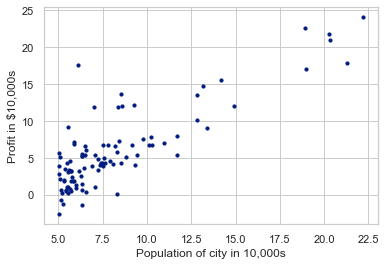

In [27]:
plt.scatter(data['population'], data['profit'],s=10)
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

# 2.2 Gradient Descent

In [28]:
def calcCost(x, y, theta):
    temp = np.power(((x * theta.T) - y), 2) 
    return np.sum(temp) / (2 * len(x))

In [29]:
data.insert(0, 'Ones', 1)

In [30]:
cols = data.shape[1]
x = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [31]:
x.head()

,Ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [32]:
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [36]:
theta = np.matrix(np.array([0,0]))

In [37]:
theta

matrix([[0, 0]])

In [38]:
x.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [39]:
calcCost(x,y,theta)

profit    32.072734
dtype: float64

## 批量梯度下降

In [45]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = calcCost(X, y, theta)
        
    return theta, cost

In [46]:
alpha = 0.01
iters = 1000

In [47]:
g, cost = gradientDescent(x, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [48]:
calcCost(x,y,g)

profit    4.515956
dtype: float64

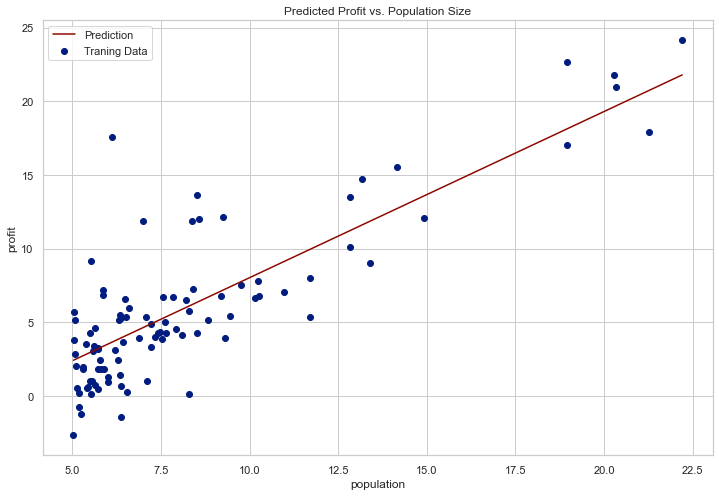

In [61]:
x = np.linspace(np.min(data['population']), np.max(data['population']), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data['population'], data['profit'], label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('population')
ax.set_ylabel('profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

In [62]:
g

matrix([[-3.24140214,  1.1272942 ]])

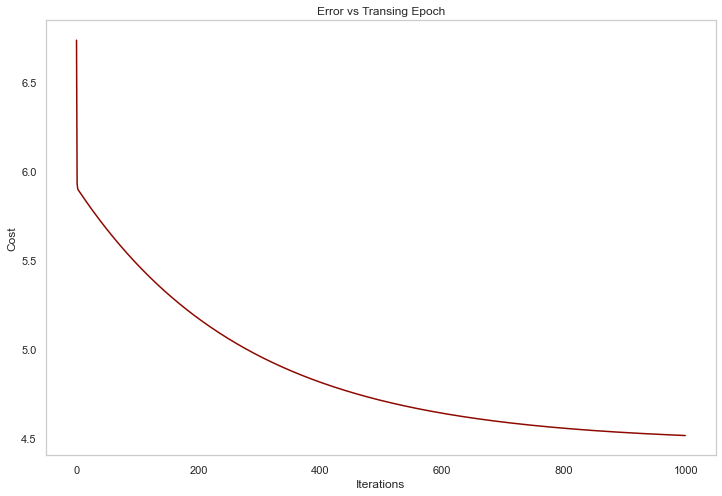

In [69]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Transing Epoch')
plt.grid(None)
plt.show()